In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../data/cleaned_heart_disease.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,slope_downsloping,slope_flat,slope_upsloping,num
0,0.708333,1,1,0.481132,0.244292,1,2,0.603053,0,2.3,0.0,6.0,1.0,0.0,0.0,0
1,0.791667,1,4,0.622642,0.365297,0,2,0.282443,1,1.5,3.0,3.0,0.0,1.0,0.0,2
2,0.791667,1,4,0.245283,0.235160,0,2,0.442748,1,2.6,2.0,7.0,0.0,1.0,0.0,1
3,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0,3.5,0.0,3.0,1.0,0.0,0.0,0
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0,1.4,0.0,3.0,0.0,0.0,1.0,0


In [3]:
x = df.drop('num', axis=1)
y = df['num']

pca = PCA(n_components=10)

x_pca = pca.fit_transform(x)

In [4]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

optimal_component = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_component}")

Optimal number of components: 7


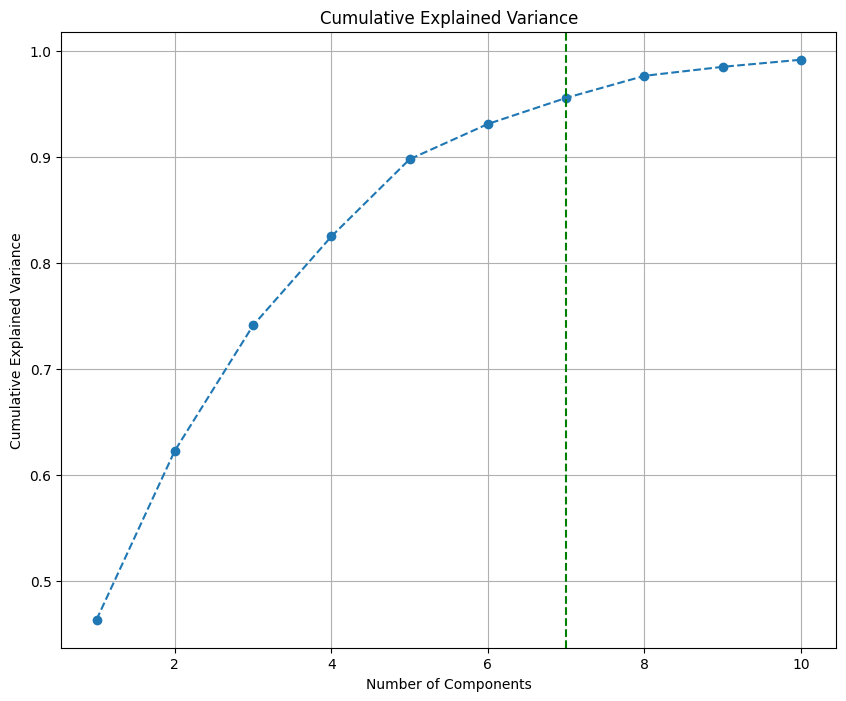

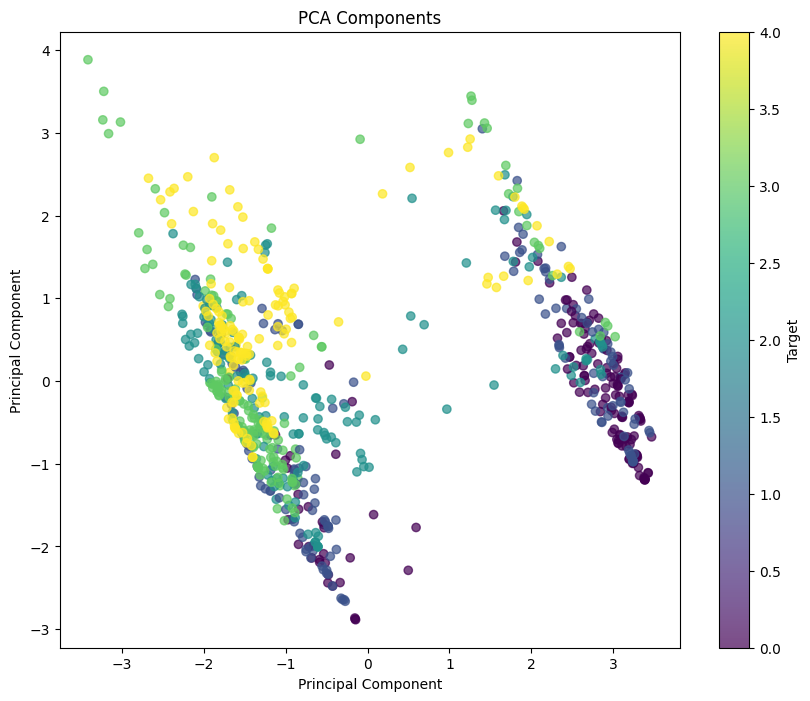

In [5]:
# Cumulative variance plot
plt.figure(figsize=(10,8))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axvline(x=optimal_component, color='g', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Scatter plot
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Principal Component')
plt.title('PCA Components')
plt.colorbar(label='Target')
plt.show()

In [6]:
df_pca = pd.DataFrame(x_pca, columns=[f'PCA {i}' for i in range(1, 11)])

df_pca = pd.concat([df_pca, y], axis=1)

df_pca.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,num
0,-0.187938,-0.250017,0.540731,2.625296,1.370536,0.475371,0.028295,0.237891,1.231052,0.100633,0
1,1.678168,2.492499,-1.012375,-1.006553,0.178382,-0.546627,-1.031356,0.093127,0.051926,-0.117759,2
2,-2.082244,1.041983,-0.576957,0.061025,-0.177385,-0.100453,-0.593091,0.191383,-0.171056,0.054527,1
3,1.807566,1.438034,2.797625,0.604580,-0.032721,0.667701,0.024738,-0.480690,0.433255,-0.406785,0
4,2.852237,0.514358,0.186248,1.607020,0.408210,0.361567,0.598903,0.450393,-0.393422,0.146794,0


In [7]:
df_pca.to_csv('../data/pca_heart_disease.csv')